## Predict Diabetes Dataset:
* [Imports and Basic Exploration](#imports)
* [Data Visualizing](#data-visualizing)
* [Splitting Database](#splitting-database)
* [Creating Models](#creating-models)

## Imports and Basic Exploration <a class="anchor" id="imports"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/predict-diabities/diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

## Data Visualizing <a class="anchor" id="data-visualizing"></a>


<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

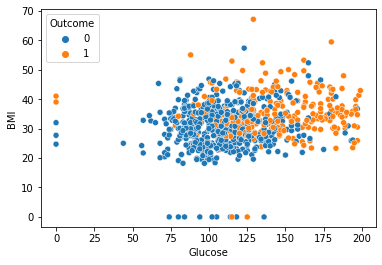

In [31]:
sns.scatterplot(x=data.Glucose, y=data.BMI, hue=data.Outcome)

<AxesSubplot:xlabel='Age', ylabel='Count'>

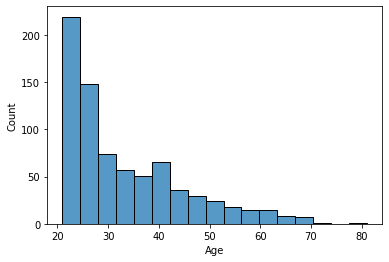

In [13]:
sns.histplot(data['Age'])

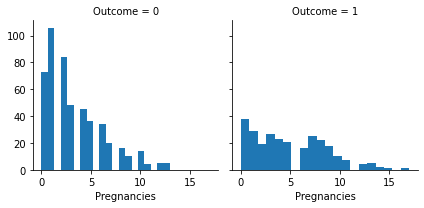

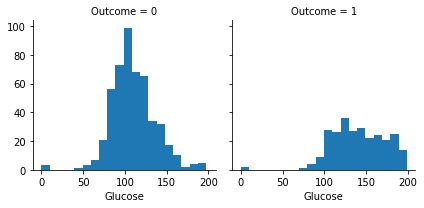

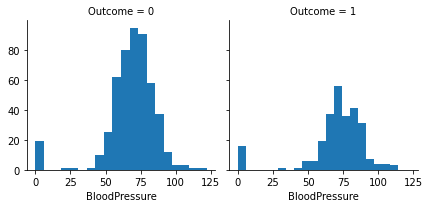

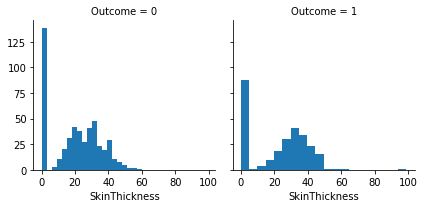

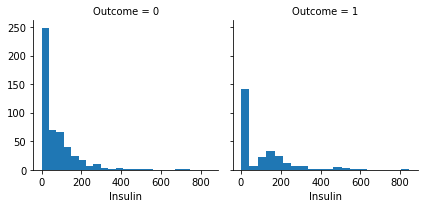

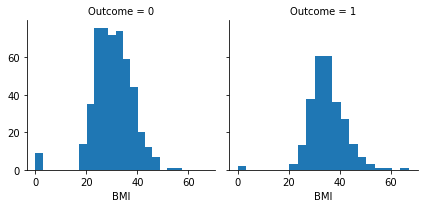

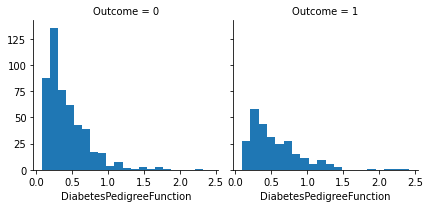

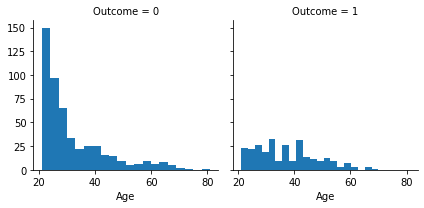

In [99]:
for col in data.columns[:-1]:
    #plt.title("{} vs Outcome".format(col))
    g = sns.FacetGrid(data, col='Outcome')
    g.map(plt.hist, col, bins=20)
    plt.show()
    

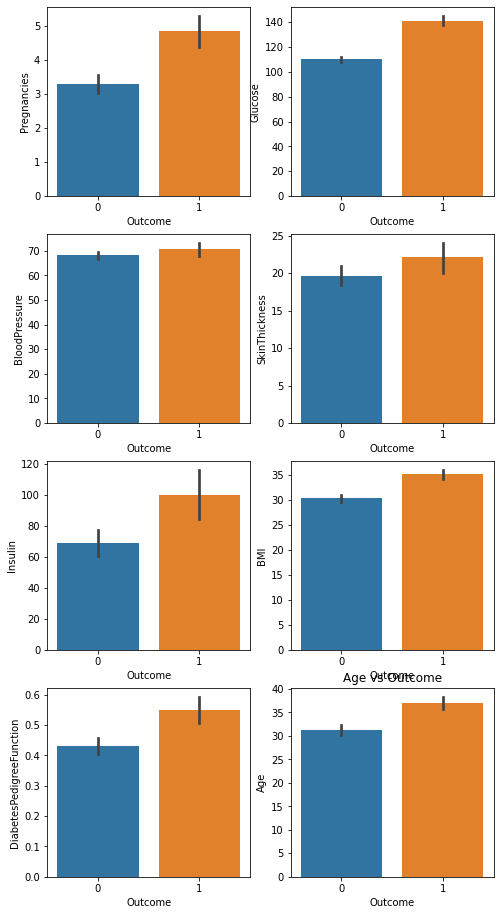

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(8, 16))
for col, ax in zip(data.columns[:-1], axes.flat):
    #print(ax)
    plt.title("{} vs Outcome".format(col))
    sns.barplot(x='Outcome', y=col, data=data, ax=ax)
plt.show()

## Splitting Database <a class="anchor" id="splitting-database"></a>

In [5]:
from sklearn.model_selection import train_test_split

X = data.copy()
y = X['Outcome']
X.drop('Outcome', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


## Creating Models <a class="anchor" id="creating-models"></a>

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

lr_model = LogisticRegression(solver='liblinear')
rfc_model = RandomForestClassifier()
dtc_model = DecisionTreeClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
xgb_model = XGBClassifier()

models = [
    lr_model,
    rfc_model,
    dtc_model,
    svc_model,
    knn_model,
    nb_model,
    xgb_model
]

In [30]:
def acc_score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    return accuracy_score(y_test, y_preds)

In [36]:
models_acc = {model: acc_score(model, X_train, y_train, X_test, y_test) for model in models}
pd.DataFrame({'Model': models_acc.keys(), 'Accuracy': models_acc.values()})


,Model,Accuracy
0,LogisticRegression(solver='liblinear'),0.818182
1,"(DecisionTreeClassifier(max_features='auto', r...",0.818182
2,DecisionTreeClassifier(),0.785714
3,SVC(),0.792208
4,KNeighborsClassifier(),0.753247
5,GaussianNB(),0.792208
6,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.759740


In [51]:
params = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
    },
    {
        'n_estimators': list(range(10, 100, 10)),
        'max_features': ['log2', 'sqrt' ],
        'min_samples_split': list(range(10, 50, 10))
        #'min_samples_leaf':
        #'min_impurity_decrease':
    },
    {
        'max_depth': list(range(1, 21)),
        'max_leaf_notes': [5, 10, 15, 20, 25, 30, 35, 40, 50, 100],
    }
]


In [53]:
# I am so tired i migth run it every one of the models
#but for now i'm just going to grid search only the top two models
#which are logictic regression and random forest
#for i, model in enumerate(models):
gscv_models = []
for i, model in enumerate(models[:2]):
    clf = GridSearchCV(model, params[i])
    clf.fit(X_train, y_train)
    print(clf.best_params_)
    gscv_models.append(clf.best_estimator_)

{'C': 1.0, 'penalty': 'l1'}
{'max_features': 'sqrt', 'min_samples_split': 30, 'n_estimators': 60}


* {'C': 1.0, 'penalty': 'l1'}
* {'max_features': 'sqrt', 'min_samples_split': 40, 'n_estimators': 80}

In [54]:
gscv_models

[LogisticRegression(penalty='l1', solver='liblinear'),
 RandomForestClassifier(max_features='sqrt', min_samples_split=30,
                        n_estimators=60)]

In [55]:
models_acc = {model: acc_score(model, X_train, y_train, X_test, y_test) for model in gscv_models}
pd.DataFrame({'Model': models_acc.keys(), 'Accuracy': models_acc.values()})


,Model,Accuracy
0,"LogisticRegression(penalty='l1', solver='libli...",0.824675
1,"(DecisionTreeClassifier(max_features='sqrt', m...",0.818182


In [58]:
X_train.shape[1]

8

### The model that worked the best is Logistic Regression with the accuracy score of 0.824675